### Prepare a classification model using SVM for salary data 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
train_df =pd.read_csv("SalaryData_Train(1).csv")

In [25]:
train_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
train_df.shape

(30161, 14)

In [27]:
test_df =pd.read_csv("SalaryData_Test(1).csv")

In [28]:
test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [29]:
test_df.shape

(15060, 14)

In [30]:
df =pd.DataFrame()
frames =[train_df,test_df]
df =pd.concat(frames)

In [31]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Data Pre-Processing 

In [32]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [33]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [34]:
df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [35]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [36]:
df.age.unique()# from 17 to 90 ==> most repaeated 36,38 

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86, 89, 87], dtype=int64)

In [37]:
df.hoursperweek.unique()# from 1 to 99 hours per week

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 43, 38, 55,
       48, 58, 32, 70, 22, 56, 41, 28, 36, 24, 46,  2, 42, 12, 65,  1, 34,
       75, 98, 33, 54, 10,  6, 64, 19, 18, 72,  8,  9, 47, 37, 21, 26, 14,
        5,  7, 99, 53, 39, 62, 59, 57, 78, 90, 66, 11, 49, 84, 17, 68,  3,
       27, 85, 31, 51, 77, 63, 23,  4, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95, 79, 69], dtype=int64)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [39]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [40]:
df['Salary'].value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

In [41]:
df['native'].value_counts()

 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

In [42]:
df['sex'].value_counts()

 Male      30527
 Female    14694
Name: sex, dtype: int64

In [43]:
df['race'].value_counts()

 White                 38902
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

In [44]:
df['relationship'].value_counts() #Not in -Family people are more

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1348
Name: relationship, dtype: int64

In [45]:
df['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2969
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [46]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

### Visualizations 

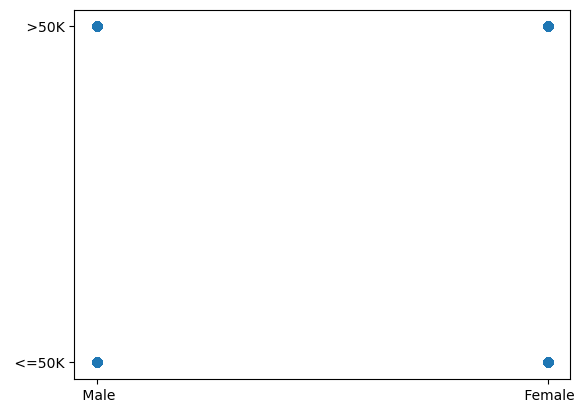

In [47]:
plt.scatter(x="sex",y="Salary",data =df)

<AxesSubplot:xlabel='race', ylabel='count'>

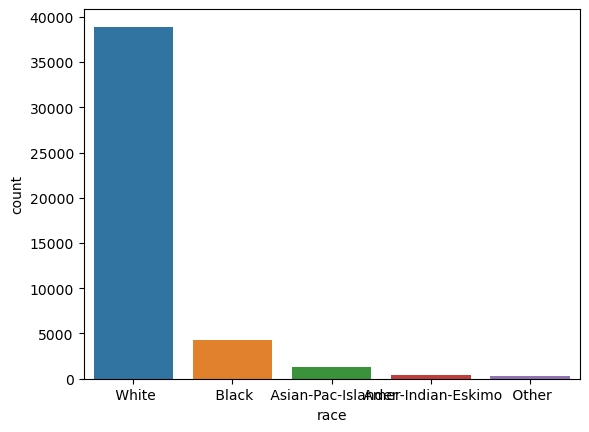

In [48]:
sns.countplot(df['race'])# white people are more in race category

<AxesSubplot:xlabel='relationship', ylabel='count'>

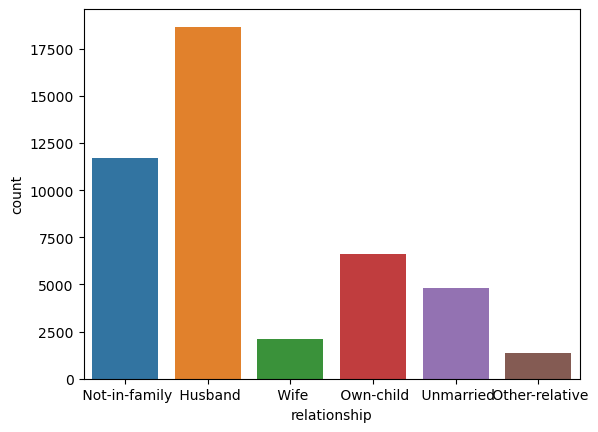

In [49]:
sns.countplot(df['relationship'])

<AxesSubplot:xlabel='hoursperweek', ylabel='count'>

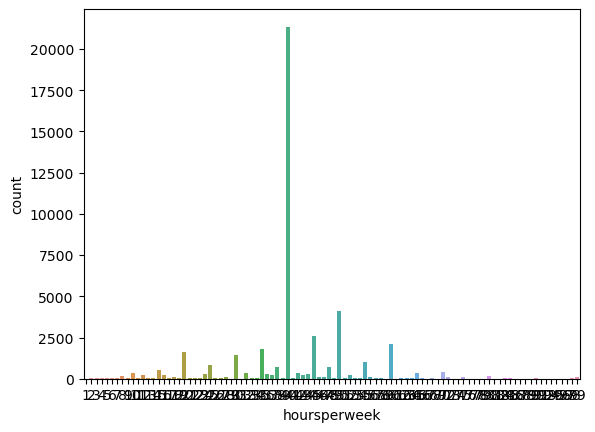

In [50]:
sns.countplot(df['hoursperweek'])

<AxesSubplot:xlabel='age', ylabel='count'>

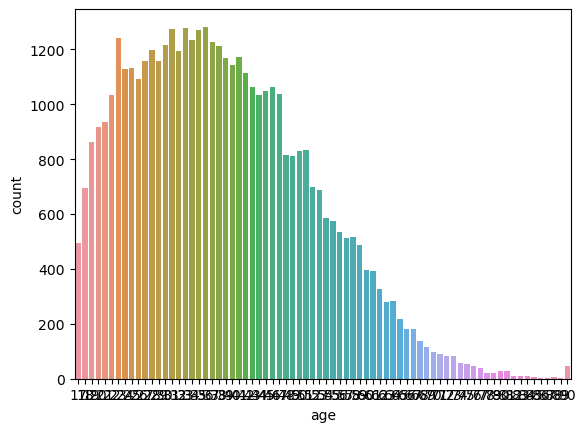

In [51]:
sns.countplot(df['age'])

(array([11524.,  2046.,  6008., 10216.,  2316.,  1480.,  4389.,  6020.,
          976.,   246.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

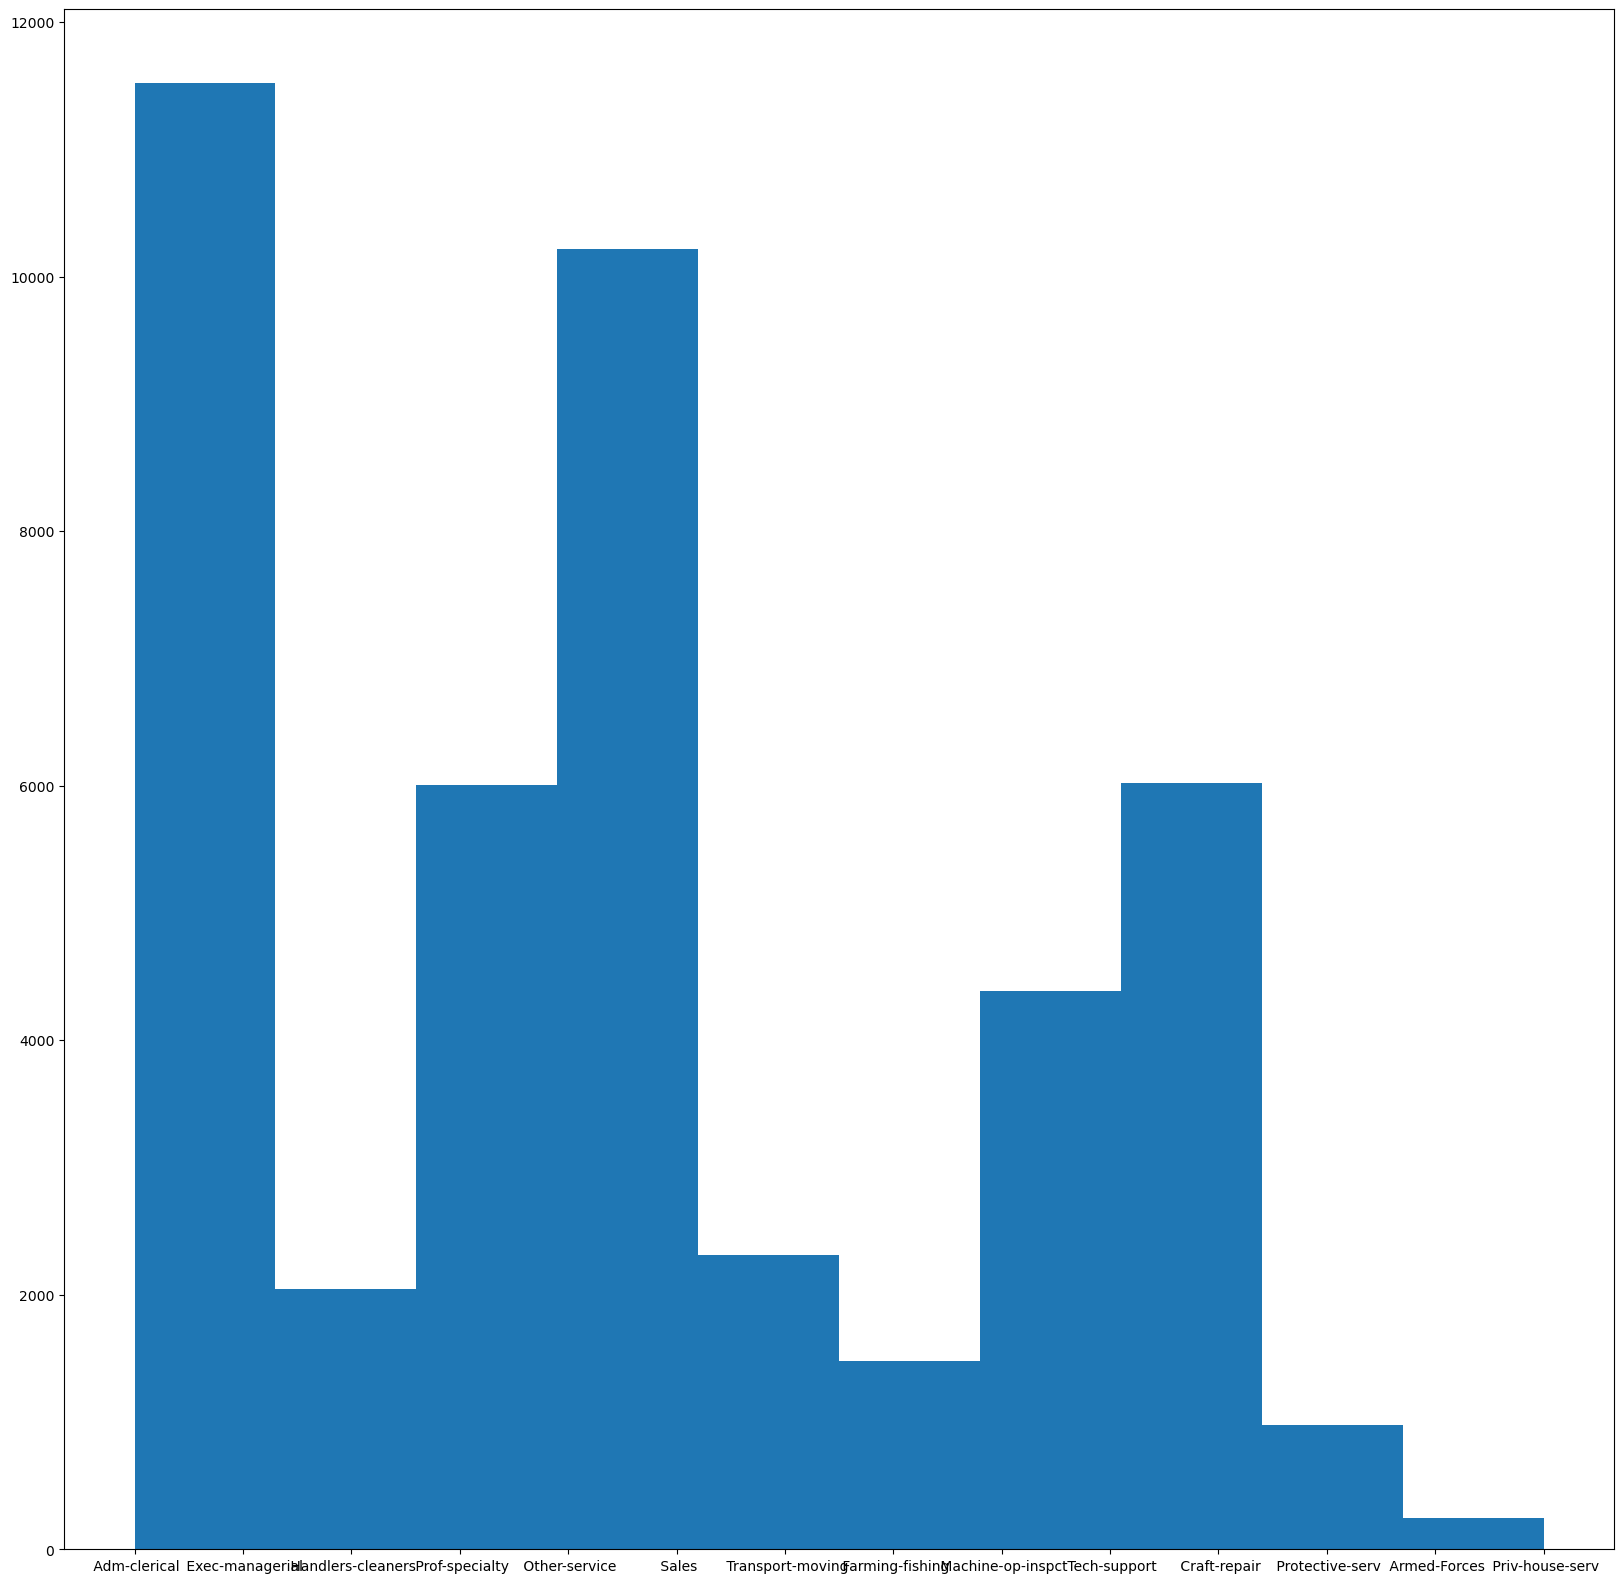

In [52]:
plt.figure(figsize=(20,20))
plt.hist(df['occupation'])

<AxesSubplot:xlabel='sex', ylabel='count'>

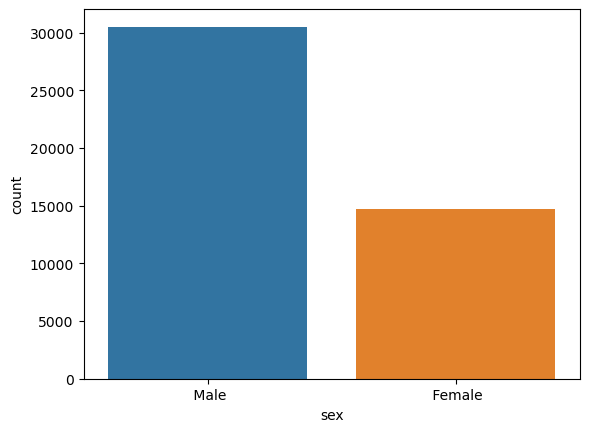

In [53]:
sns.countplot(df['sex'])

(array([34013.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11208.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

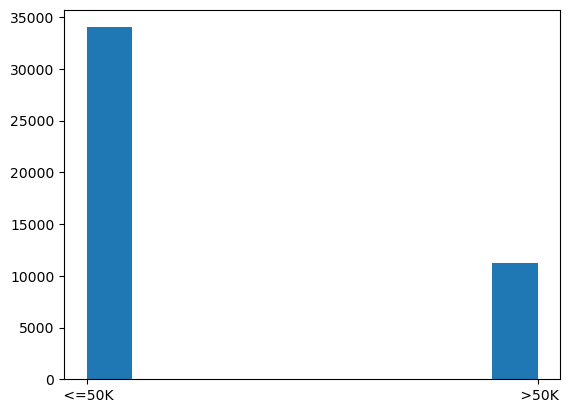

In [54]:
plt.hist(df['Salary'])

In [55]:
def count_plot(data, columns):
    plt.figure(figsize=(15, 10))
    for indx, var  in enumerate(columns):
        plt.subplot(5,3 , indx+1)
        g = sns.countplot(data[var], hue= data['Salary'])
    plt.tight_layout()
features = df.columns.tolist()
features.remove('Salary')
features   

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

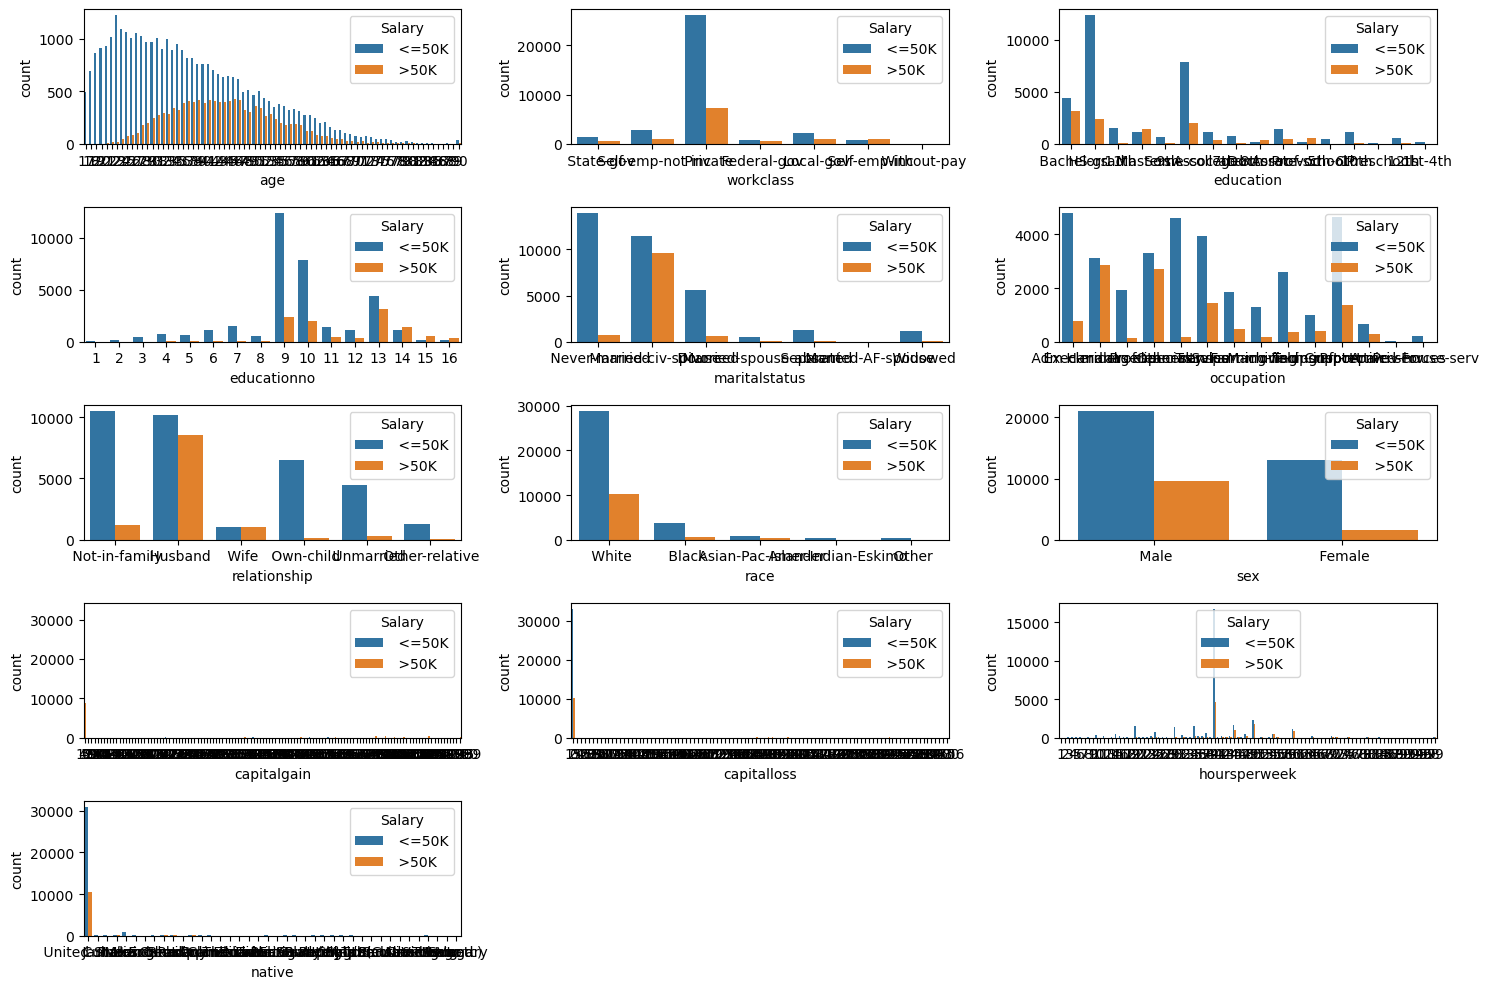

In [56]:
count_plot(df,features)

In [57]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [58]:
features = df.columns.tolist()
features.remove('Salary')
features    

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

In [59]:
encoder2 =OrdinalEncoder()
data_encoded =encoder2.fit_transform(df[features])
data_encoded =pd.DataFrame(data_encoded,columns =features)

In [60]:
encoder =LabelEncoder()
df['Salary']=encoder.fit_transform(df['Salary'])

In [61]:
data_encoded['Salary'] =df['Salary'].values

In [62]:
data_encoded

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22.0,5.0,9.0,12.0,4.0,0.0,1.0,4.0,1.0,26.0,0.0,39.0,37.0,0
1,33.0,4.0,9.0,12.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,12.0,37.0,0
2,21.0,2.0,11.0,8.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,39.0,37.0,0
3,36.0,2.0,1.0,6.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,39.0,37.0,0
4,11.0,2.0,9.0,12.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,39.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,16.0,2.0,9.0,12.0,4.0,9.0,3.0,4.0,1.0,0.0,0.0,39.0,37.0,0
45217,22.0,2.0,9.0,12.0,0.0,9.0,1.0,4.0,0.0,0.0,0.0,35.0,37.0,0
45218,21.0,2.0,9.0,12.0,2.0,9.0,0.0,4.0,1.0,0.0,0.0,49.0,37.0,0
45219,27.0,2.0,9.0,12.0,0.0,0.0,3.0,1.0,1.0,81.0,0.0,39.0,37.0,0


In [63]:
data_encoded.shape

(45221, 14)

In [64]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

In [65]:
X =data_encoded.iloc[:,0:]
y=data_encoded['Salary']

In [66]:
X_train ,X_test, y_train, y_test =train_test_split(X,y,test_size =0.3,random_state =10,stratify=y)

In [ ]:
svc = svm.SVC(kernel='rbf', C=1,gamma=0.5).fit(X_train ,y_train)
y_pred =svc.predict(X_test)